# Decision Tree

## 1. Brief Overview

Decision Tree algorithm is a supervised learning algorithm. Unlike other supervised learning algorithms, the decision tree algorithm can also be used for solving regression and classification problems too.<br>
Types of Decision Trees: it is based on the type of target variable we have. It can be of two types:
- <b>Categorical Variable Decision Tree</b>: it has a categorical target variable.
- <b>Continuous Variable Decision Tree</b>: it has a continuous target variable. <br><br>

Assumptions while creating decision tree:
- In the beginning, the whole training set is considered as the root.
- Feature values are preferred to be categorical.
- Records are distributed recursively on the basis of attribute values.
- Order to placing attributes as root or internal node of the tree is done by using some statistical approach.<br><br>

The most important step in the Decision Tree is to the attribute selection, what attribute to select to place at the root and at different levels. We do that by some criterias like:
- <b>Entropy</b>: It is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information.
- <b>Information Gain</b>: It is a statistical property that measures how well a given attribute separates the training examples according to their target classification.
- <b>Gini Index</b>
- <b>Gain Ratio</b>

Importing the necessary packages

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
pima = pd.read_csv("diabetes.csv")

## 2. Exploratory Data Analysis

In [3]:
pima.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
columns=pima.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
pima[['BMI', 'Outcome']].groupby(['BMI'], as_index=False).mean().sort_values(by='Outcome')

BMI  Outcome
84   28.8      0.0
207  42.8      0.0
100  30.7      0.0
213  43.5      0.0
96   30.2      0.0
..    ...      ...
215  44.0      1.0
216  44.1      1.0
97   30.3      1.0
203  42.3      1.0
247  67.1      1.0

[248 rows x 2 columns]

In [6]:
pima_diabetes=pima.loc[pima['Outcome']==1]
pima_no_diabetes=pima.loc[pima['Outcome']==0]

In [7]:
BMI_diabetes_avg=pima_diabetes['BMI'].mean()
BMI_no_diabetes_avg=pima_no_diabetes['BMI'].mean()
BMI_diabetes_avg, BMI_no_diabetes_avg

(35.14253731343278, 30.30419999999996)

In [8]:
Age_diabetes_avg=pima_diabetes['Age'].mean()
Age_no_diabetes_avg=pima_no_diabetes['Age'].mean()
Age_diabetes_avg, Age_no_diabetes_avg

(37.06716417910448, 31.19)

In [9]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] 
y = pima.Outcome

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
print("--------- Train_Set --------- ")
print(X_train.head())
print("\n")
print("--------- Test_Set ---------")
print(X_test.head())

--------- Train_Set --------- 
     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
88            15      110  37.1   43      136             70   
467            0      100  36.8   25       97             64   
550            1        0  27.4   21      116             70   
147            2      119  30.5   34      106             64   
481            0        0  35.2   29      123             88   

     DiabetesPedigreeFunction  
88                      0.153  
467                     0.600  
550                     0.204  
147                     1.400  
481                     0.197  


--------- Test_Set ---------
     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
285            7      135  26.0   51      136             74   
101            1        0  26.1   22      151             60   
581            6        0  25.0   27      109             60   
352            3        0  34.4   46       61             82   
726            1      180  36.1   25     

In [12]:
print("--------- Train_Set ---------")
print(X_train.describe())
print("\n")
print("--------- Test_Set ---------")
print(X_test.describe())

--------- Train_Set ---------
       Pregnancies     Insulin         BMI         Age     Glucose  \
count   537.000000  537.000000  537.000000  537.000000  537.000000   
mean      3.757914   77.500931   31.838920   33.312849  121.001862   
std       3.355361  112.715401    7.675022   11.967574   31.244492   
min       0.000000    0.000000    0.000000   21.000000    0.000000   
25%       1.000000    0.000000   27.000000   24.000000  100.000000   
50%       3.000000    0.000000   32.000000   29.000000  117.000000   
75%       6.000000  126.000000   36.400000   41.000000  140.000000   
max      15.000000  744.000000   67.100000   72.000000  198.000000   

       BloodPressure  DiabetesPedigreeFunction  
count     537.000000                537.000000  
mean       68.951583                  0.468156  
std        20.115002                  0.333139  
min         0.000000                  0.085000  
25%        62.000000                  0.240000  
50%        72.000000                  0.35500

In [13]:
print("---------In the train set ---------")
print(X_train.isna().sum())
print("\n")
print("--------- In the test set ---------")
print(X_test.isna().sum())

---------In the train set ---------
Pregnancies                 0
Insulin                     0
BMI                         0
Age                         0
Glucose                     0
BloodPressure               0
DiabetesPedigreeFunction    0
dtype: int64


--------- In the test set ---------
Pregnancies                 0
Insulin                     0
BMI                         0
Age                         0
Glucose                     0
BloodPressure               0
DiabetesPedigreeFunction    0
dtype: int64


The data set does not have any NA or missing values. There is not much pre-processing needed hence.

## 3. Modelling

In [14]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [16]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\Users\chashah4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


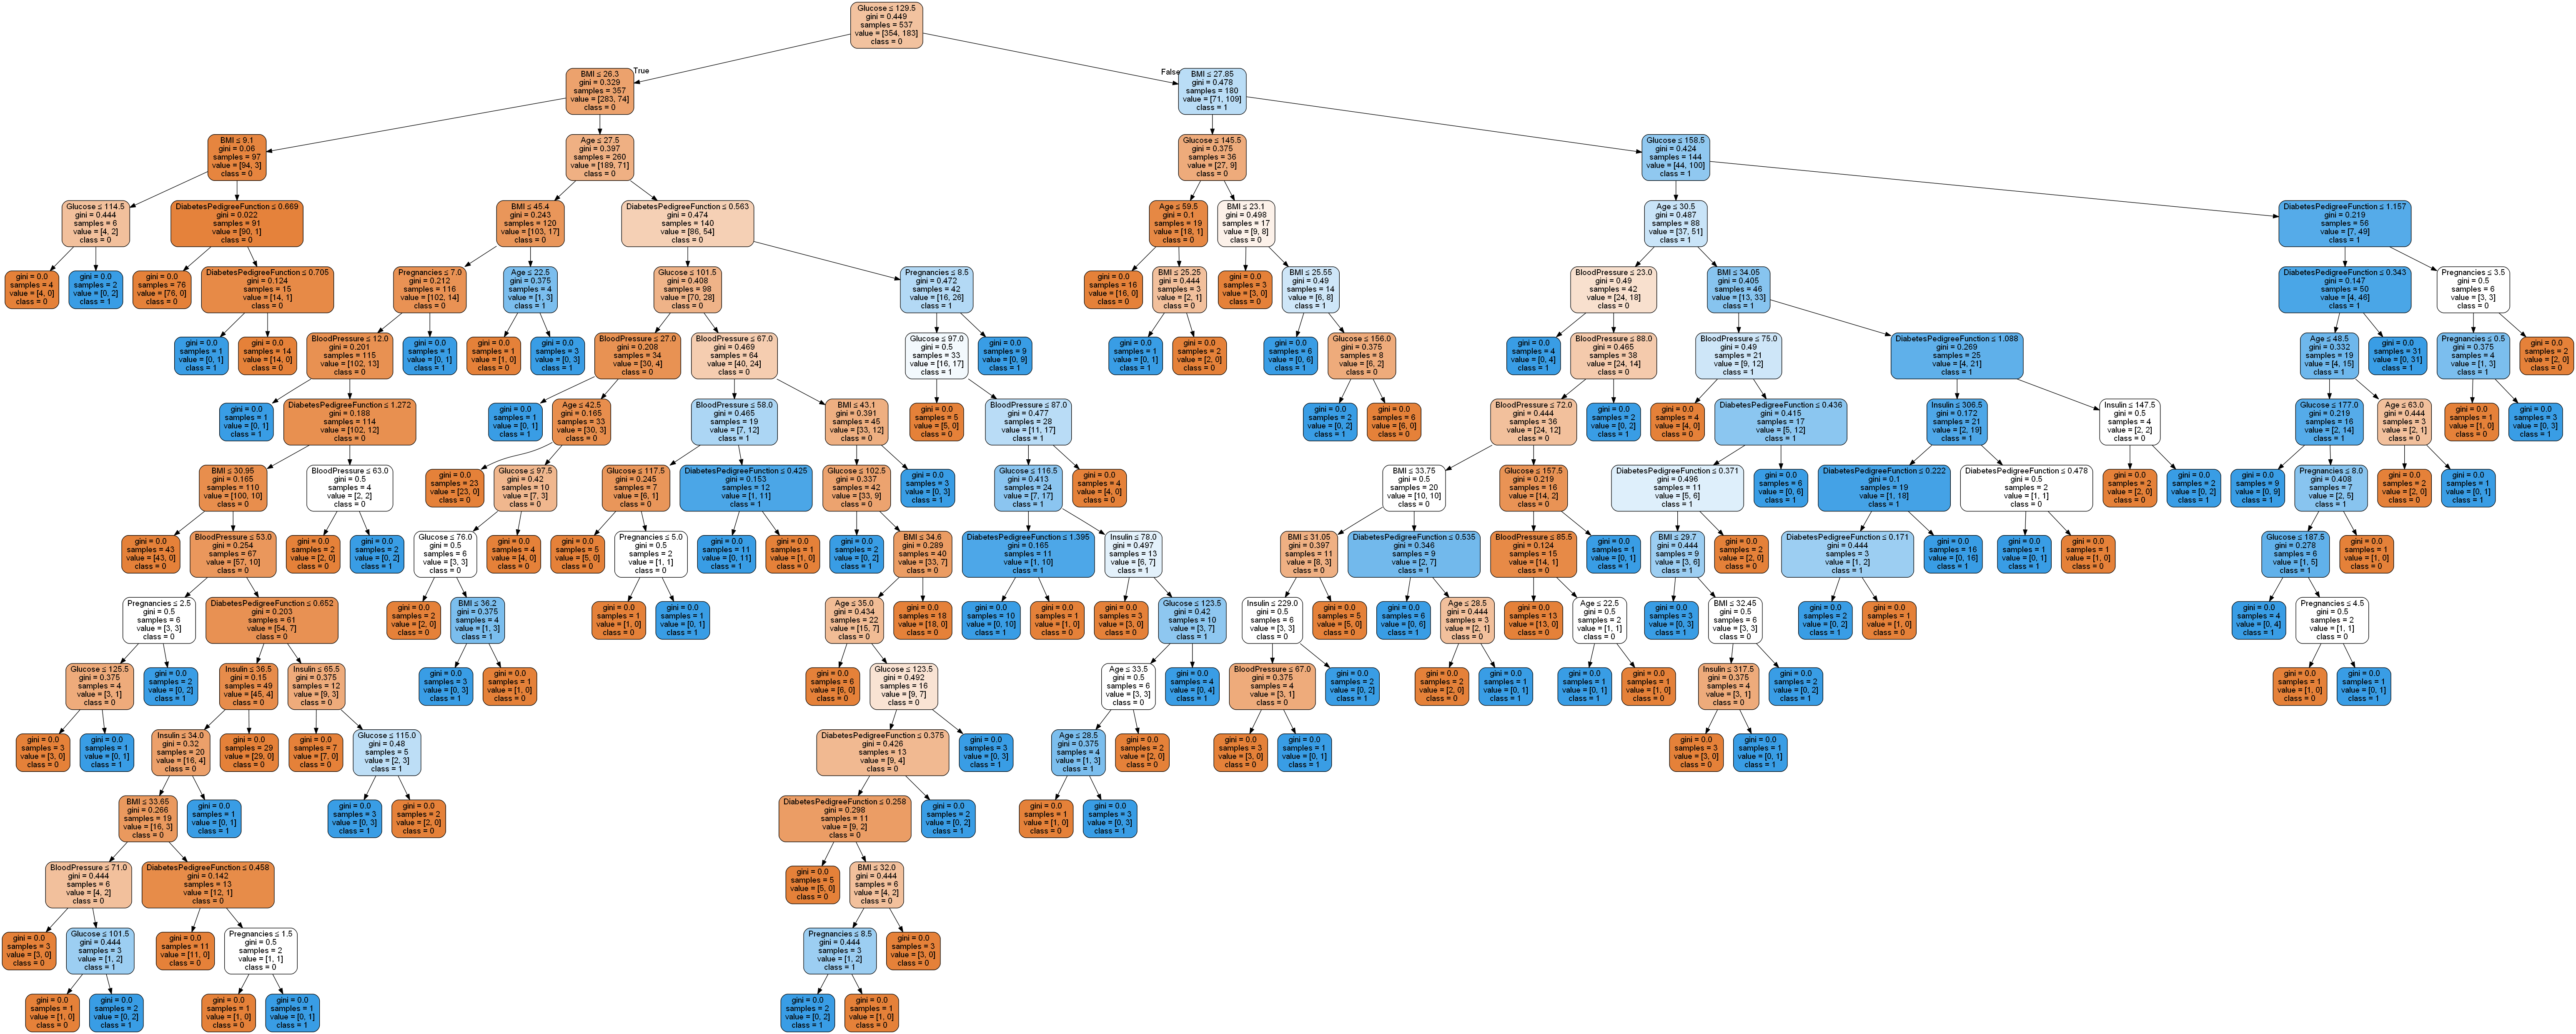

In [17]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## 4. Overfitting

The common problem with Decision trees is overfitting. It can even give 100% accuracy on the training data set because in the worse case it will end up making 1 leaf for each observation, this will happen if there is no limit set on a decision tree.
There are two ways to remove overfitting:
- <b>Pruning Decision Trees</b>: Segregating the actual training set into two sets: training data set, D and validation data set, V. Prepare the decision tree using the segregated training data set, D. Then continue trimming the tree accordingly to optimize the accuracy of the validation data set, V.
- <b>Random Forest</b>: It is an example of ensemble learning, in which we combine multiple machine learning algorithms to obtain better predictive performance. A random sampling of training data set is considered when building trees and Random subsets of features considered when splitting nodes gives it the name 'random'. A single learning algorithm model is built on all samples and later, the resultant predictions are combined using voting or averaging in parallel.